In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn

In [3]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe = fm.FontEntry (
    fname = r'font/NanumGothic.ttf',
    name = 'NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)

# pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.family': 'NanumGothic', 'font.size': 14})
# pyplot에서 `-`를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [4]:
iris = seaborn.load_dataset('iris') # 붓꽃 데이터
titanic = seaborn.load_dataset('titanic') # 타이타닉 데이터
tips = seaborn.load_dataset('tips') # 팁 데이터
flight = seaborn.load_dataset('flights') # 여객기 데이터

### seaborn을 활용한 1차원 분포 플롯
seaborn 패키지에서 제공해주는 여러 가지 메서드를 활용하여 간단하게 1차원 분포 플롯을 표시 할 수 있음 

#### 1차원 실수 분포 플롯
seaborn 패키지는 히스토그램 형식과는 다른 커널 밀도, 러그 플롯을 제공함
`rugplot()` : 데이터 위치를 x축 위에 작은 선분으로 표시 (러그 플롯)  
`kdeplot()` : 히스토그램과 비슷하지만 곡선형태로 표시 (커널 플롯)  


In [5]:
data = iris.petal_length.values
data

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

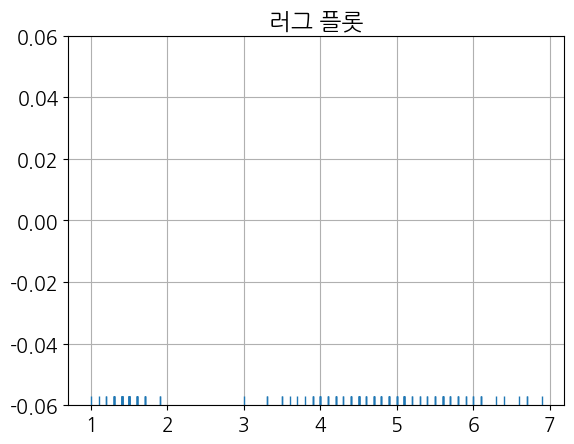

In [6]:
seaborn.rugplot(data)
plt.title('러그 플롯')
plt.grid(True)
plt.show()

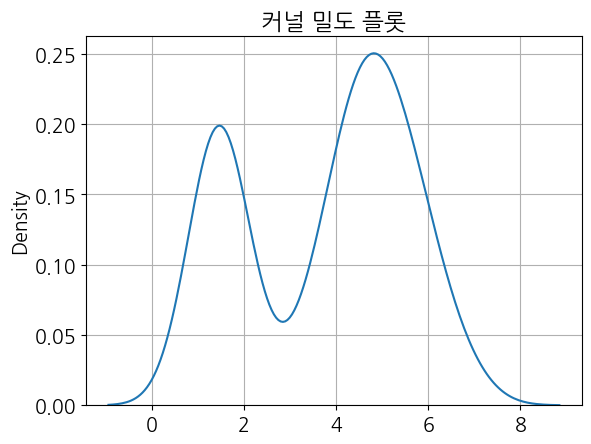

In [7]:
seaborn.kdeplot(data)
plt.title("커널 밀도 플롯")
plt.grid(True)
plt.show()

### 카운트 
seaborn 패키지의 `countplot()` 메서드로 각 카데고리 별 사이즈를 표시할 수 있음  
`countplot()` 메서드는 데이터프레임만 사용가능  
`countplot(x = '컬럼명', data = 데이터프레임)`

Text(0.5, 1.0, '타이타닉 카운트 플롯')

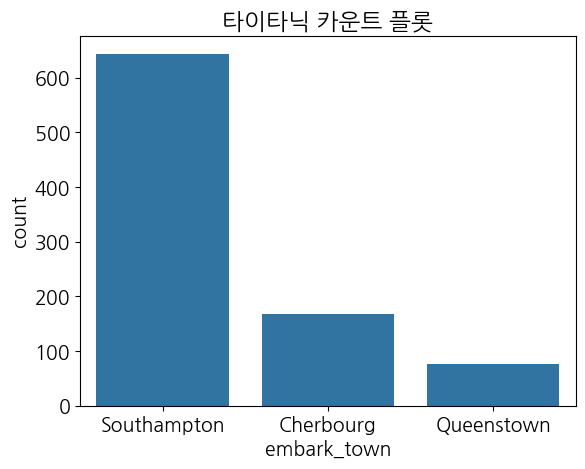

In [8]:
seaborn.countplot(x = 'embark_town', data = titanic)
plt.title('타이타닉 카운트 플롯')

In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


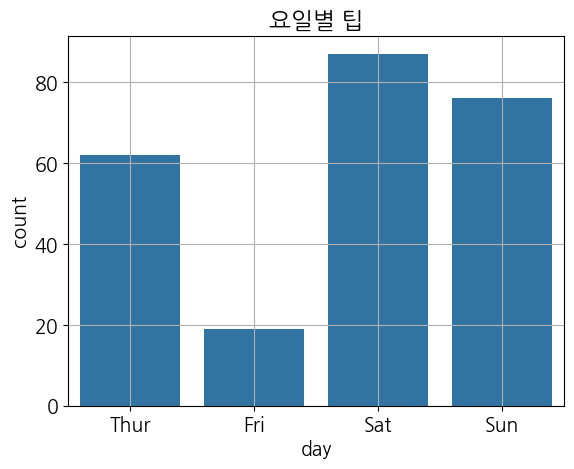

In [10]:
seaborn.countplot(x = 'day', data = tips)
plt.title('요일별 팁')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 데이터
다차원 데이터는 3가지의 경우의 수를 가질 수 있음

- 모든 데이터가 실수형  
- 모든 데이터가 카테고리형  
- 데이터가 실수형과 카테고리형이 섞여 있음

### 2차원 실수형 데이터
데이터가 2차원이면서 모두 실수이면 `jointplot()` 메서드를 사용하여 표현 할 수 있음  
`jointplot()` : 스캐터 플롯, 등고선 플롯 등을 나타낼 수 있고 양측에 히스토그램을 표현해줌 (데이터 프레임만 사용가능)  

In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


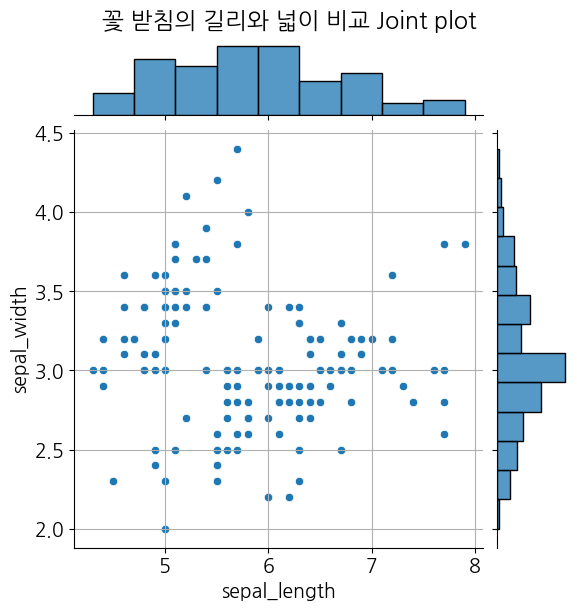

In [12]:
seaborn.jointplot(data = iris, x = 'sepal_length', y = 'sepal_width', kind = 'scatter') # scatter : 스캐터 플롯
plt.suptitle('꽃 받침의 길리와 넓이 비교 Joint plot', y = 1.02)
plt.grid(True)
plt.show()

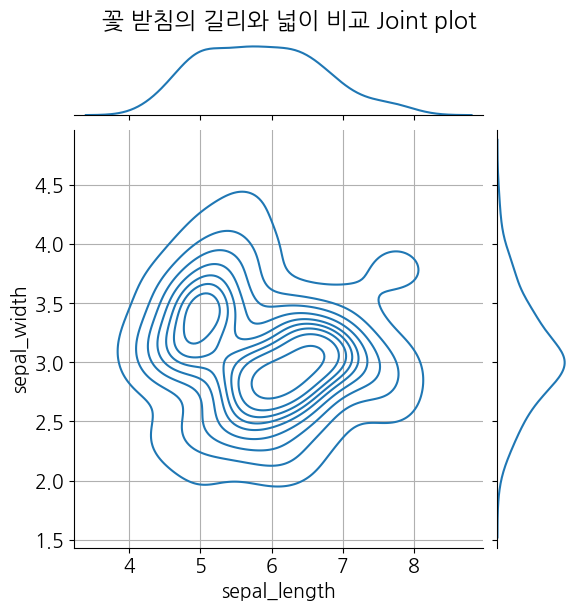

In [13]:
seaborn.jointplot(data = iris, x = 'sepal_length', y = 'sepal_width', kind = 'kde')  # kde : 커널밀도 히스토그램 그림
plt.suptitle('꽃 받침의 길리와 넓이 비교 Joint plot', y = 1.02)
plt.grid(True)
plt.show()

### 다차원 실수형 데이터
3차원 이상의 데이터라면 `pairplot()` 메서드로 그리드 형태의 스캐터 플롯의 행렬을 만들어 줌  
같은 데이터가 만나는 대각선에는 각 데이터의 히스토그램을 표현 

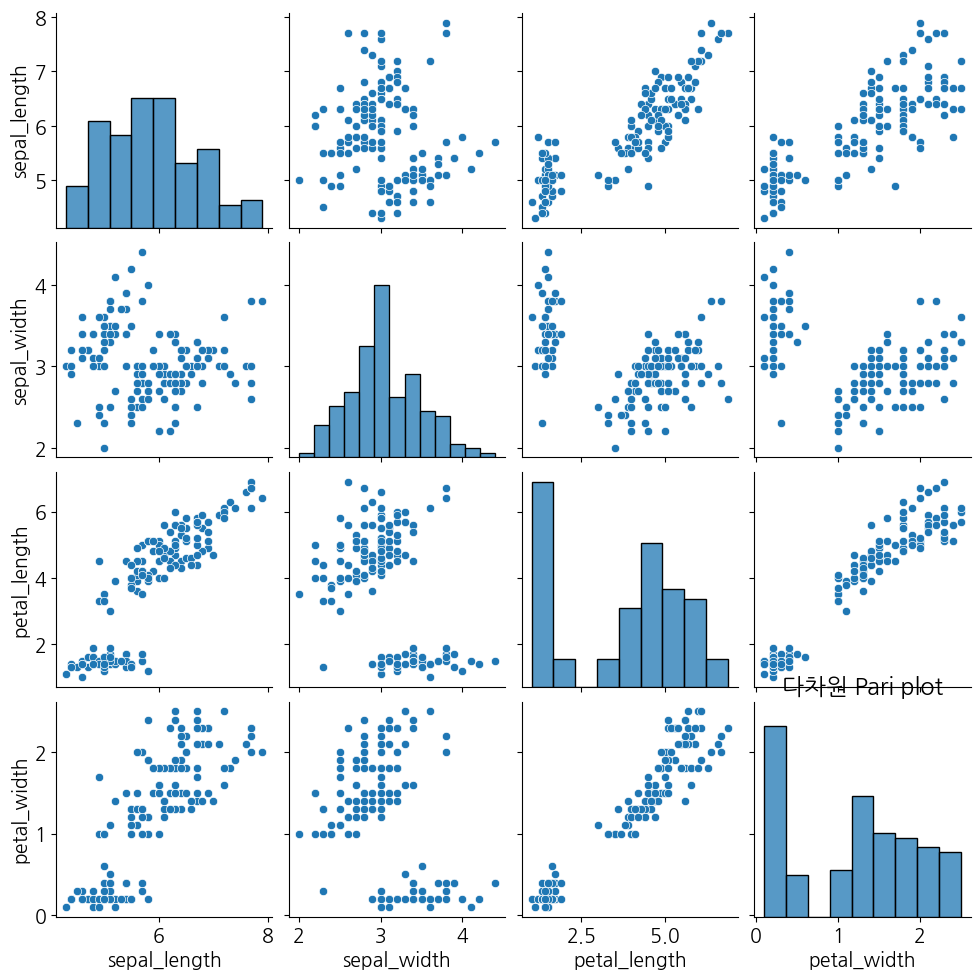

In [14]:
seaborn.pairplot(iris)
plt.title('다차원 Pari plot')
plt.grid(True)
plt.show()

카테고리형 데이터가 포함되어 있는 경우라면 hue 인수에 카테고리 변수 이름을 지정함

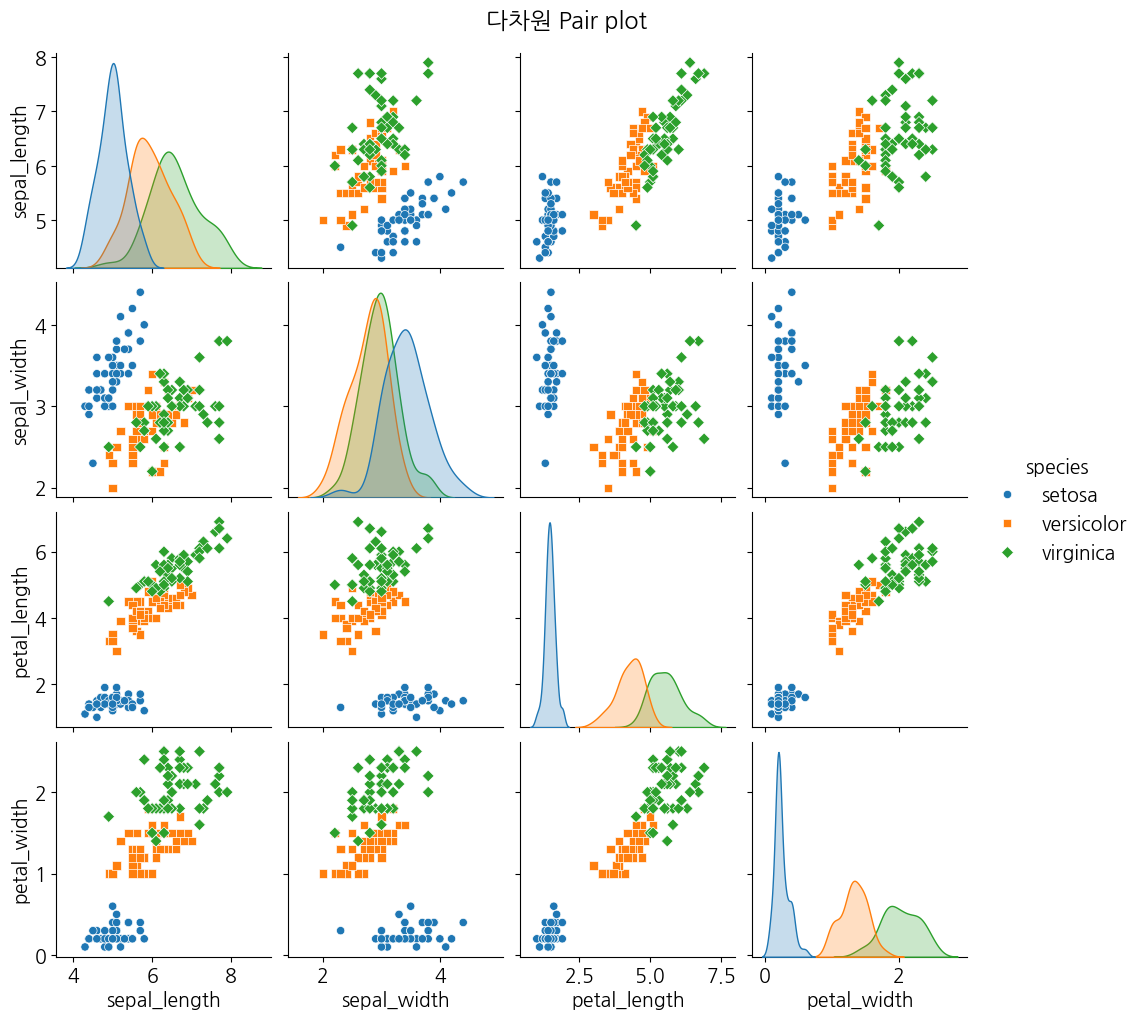

In [15]:
seaborn.pairplot(iris, hue='species', markers=['o', 's', 'D'])
plt.suptitle('다차원 Pair plot', y=1.02)
plt.show()

### 2차원 카테고리 데이터 
데이터가 2차원이고 모든 값이 카테고리 값이면 `heatmap` 명령을 사용

In [16]:
titanic_size  = titanic.pivot_table(
index = 'class', columns="sex", aggfunc="size")
titanic_size


C:\Users\ITPS\AppData\Local\Temp\ipykernel_15324\1959706414.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic_size  = titanic.pivot_table(


sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


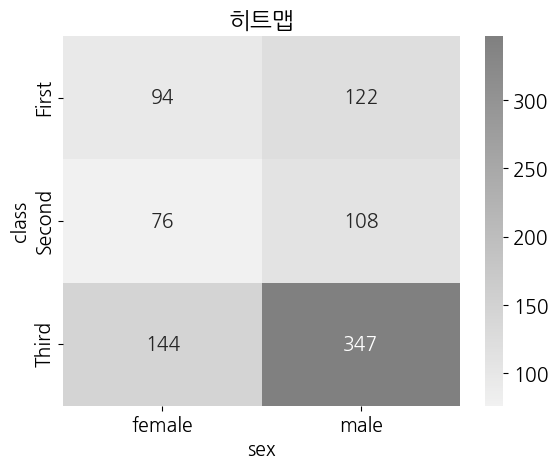

In [17]:
seaborn.heatmap(titanic_size, cmap = seaborn.light_palette('gray' ,as_cmap = True), 
annot = True, fmt = 'd' )
plt.title('히트맵')
plt.show()

### 2차원 복합 데이터
데이터가 2차원이면서 실수 값과 카테고리 값이 섞여 있다면 기존 플롯 외의 다른 플롯을 사용 할 수 있음

`barplot` : 카테고리 값에 따른 실수 값의 평균과 표준 편차를 바 형태로 표시  
평균은 막대 그래프로, 편차는 에러바로 표현

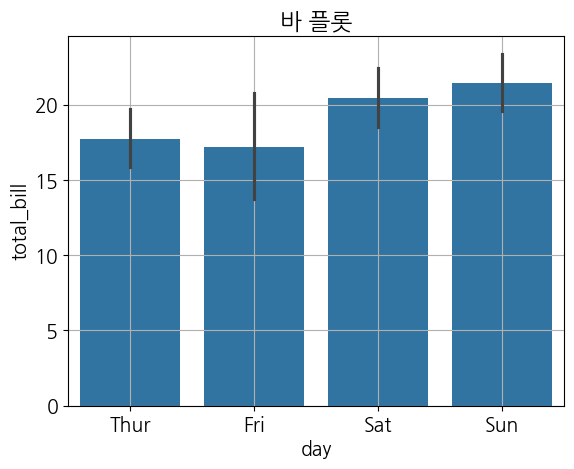

In [18]:
seaborn.barplot(data = tips, x = 'day', y = 'total_bill' )
plt.title('바 플롯')
plt.grid(True)
plt.show()

`boxplot()` : 사분위수와 아웃라이어라는 데이터를 표현하는 방법

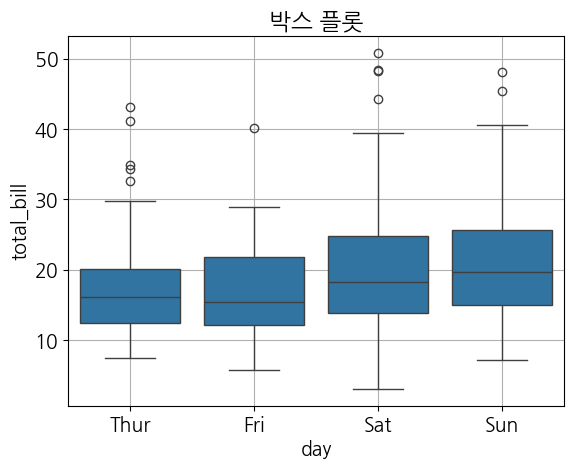

In [19]:
seaborn.boxplot(data = tips, x = 'day', y = 'total_bill')
plt.title('박스 플롯')
plt.grid(True)
plt.show()

`violinplot()` : 세로 방향으로 커널 밀도 히스토그램을 그려줌 

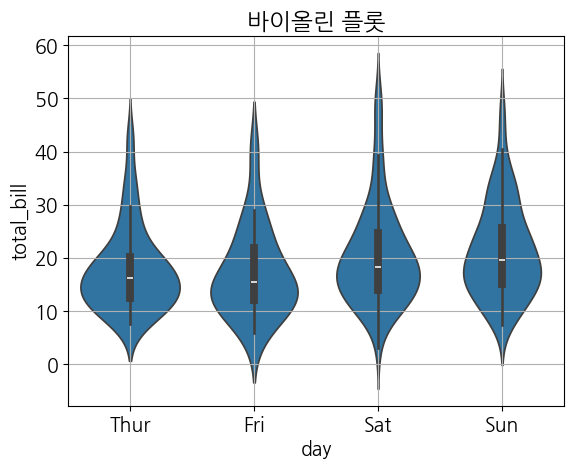

In [20]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stripplot`은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다. `jitter=True`를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 함

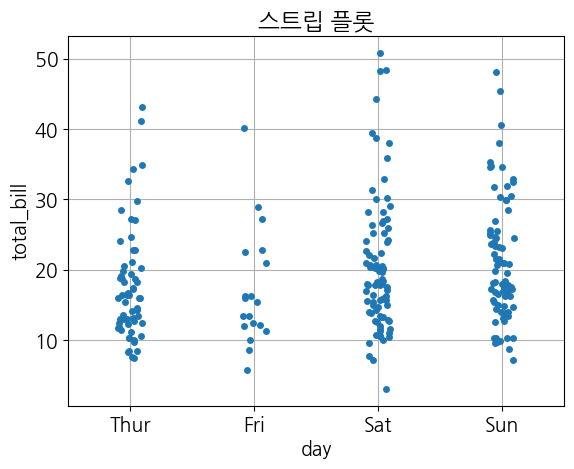

In [21]:
np.random.seed(0)
seaborn.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("스트립 플롯")
plt.grid(True)
plt.show()

`swarmplot`은 `stripplot`과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동

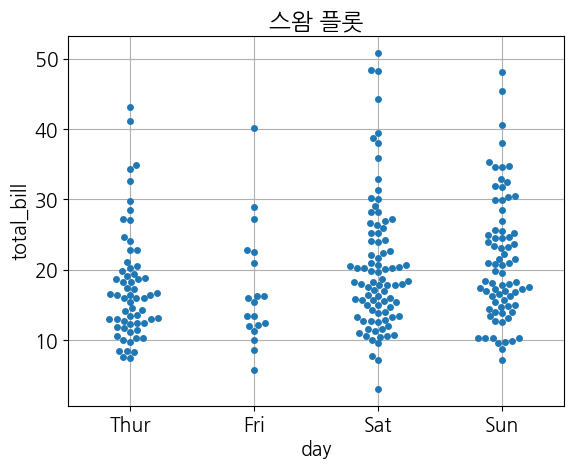

In [22]:
seaborn.swarmplot(x="day", y="total_bill", data=tips)
plt.title("스왐 플롯")
plt.grid(True)
plt.show()

### Seaborn 활용 다차원 복합 데이터

seaborn에서 제공해주는 플롯 메서드들은 `hue`인수로 카테고리 값을 추가로 지정할 수 있음

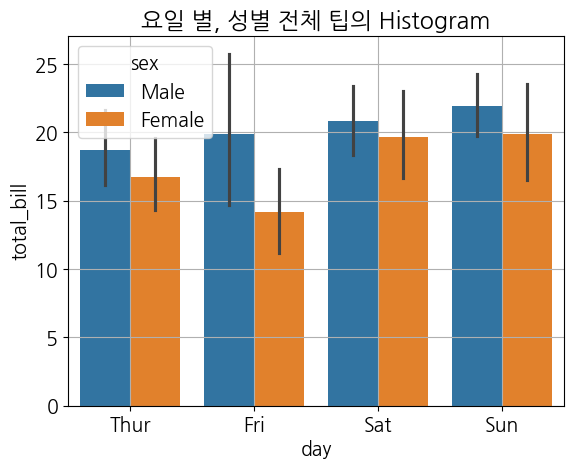

In [23]:
seaborn.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.grid(True)
plt.show()

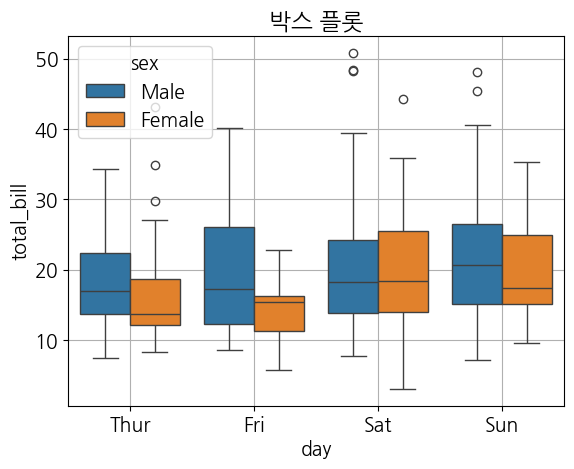

In [24]:
seaborn.boxplot(data = tips, x = 'day', y = 'total_bill', hue ='sex')
plt.title('박스 플롯')
plt.grid(True)
plt.show()

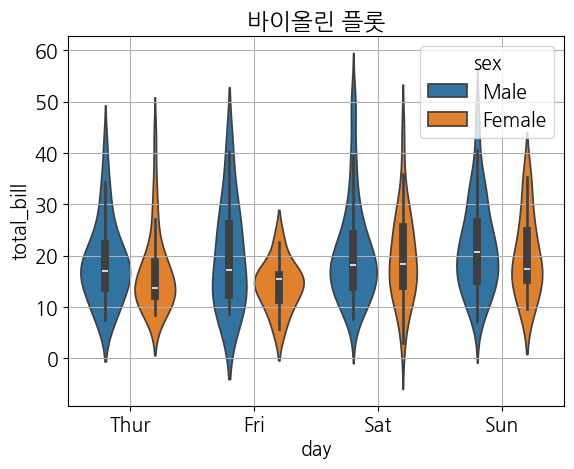

In [25]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill' , hue = 'sex')
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

`stipplot()` , `swarmplot()` , `violinplot()`은 `split`, `dodge` 인수로  
시각화 방법을 변경 할 수 있음

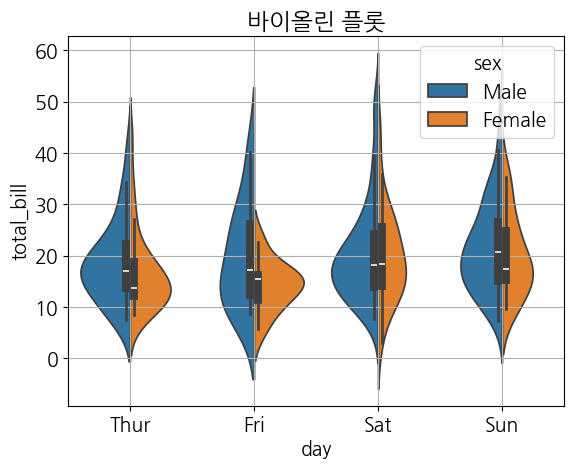

In [26]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill' , hue = 'sex', split = True)
plt.title('바이올린 플롯')
plt.grid(True)
plt.show()

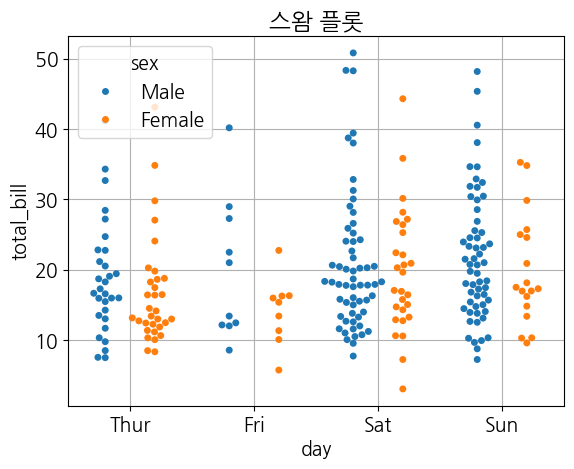

In [27]:
seaborn.swarmplot(data=tips, x="day", y="total_bill", hue = 'sex', dodge = True)
plt.title("스왐 플롯")
plt.grid(True)
plt.show()

`heatmap`으로도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있음

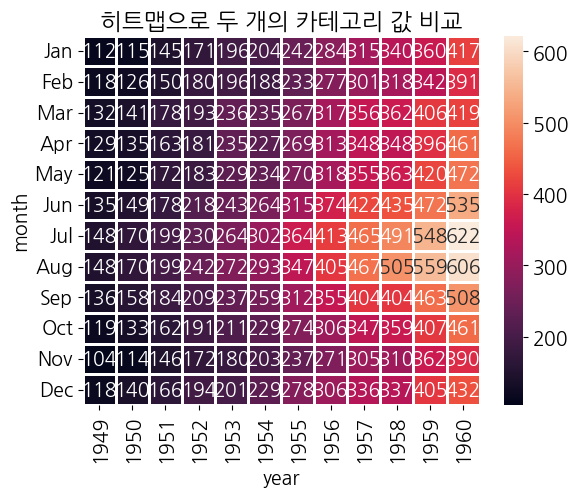

In [28]:
passenger = flight.pivot(index = 'month', columns = 'year', values = 'passengers')

plt.title('히트맵으로 두 개의 카테고리 값 비교')
seaborn.heatmap(passenger, annot = True,fmt="d", linewidths=1)
plt.show()

### seaborn을 활용한 catplot
색상과 행을 사용해서 3개 이상의 카테고리 값의 분포를 표현

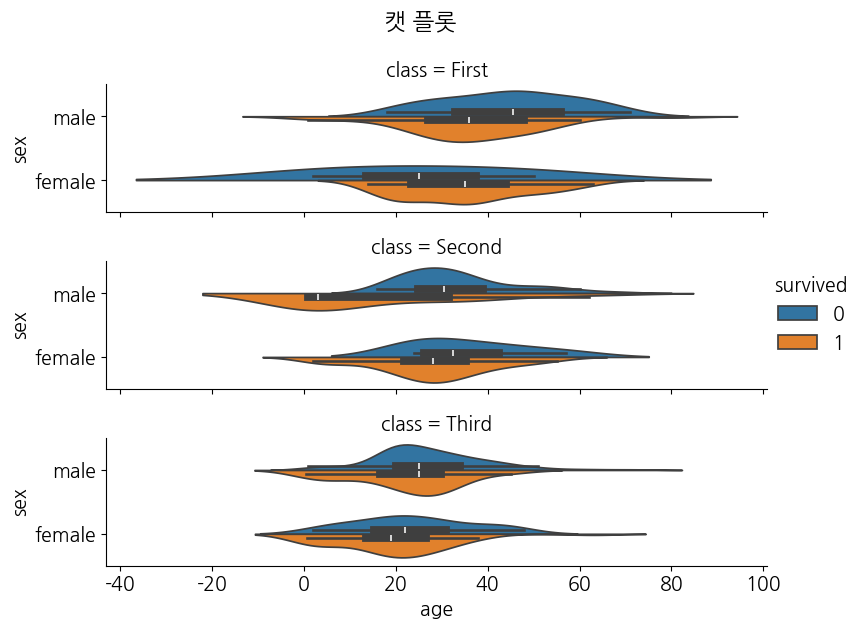

In [29]:
data = titanic[titanic.survived.notnull()]

seaborn.catplot(data = data, x = 'age', y = 'sex', hue = 'survived', row = 'class',
kind = 'violin', split = True, height = 2, aspect= 4 )
plt.suptitle('캣 플롯', y = 1.05)
plt.show()

### seaborn을 활용한 차트 겹치기
시각적 효과를 높히기 위해 여러 종류의 차트를 겹쳐서 표기 가능

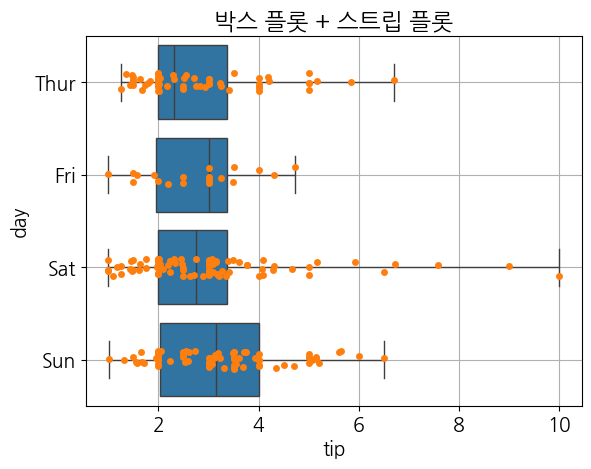

In [33]:
plt.title('박스 플롯 + 스트립 플롯')
seaborn.boxplot(data = tips, x = 'tip' , y = 'day' , whis = np.inf)
seaborn.stripplot(data = tips, x = 'tip', y = 'day')
plt.grid(True)
plt.show()

plt.title('바이올린 플롯 + 스웜 플롯')
seaborn.violinplot(data = tips, x = 'tip', y= 'day')
seaborn.swarmplot(data = tips , x = 'tip', y= 'day')
plt.grid(True)
plt.show()